In [2]:
import numpy as np 
import pandas as pd

In [3]:
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}
# 0 - 黑皮诺，1 - 赤霞珠
wine_data = pd.DataFrame(rowdata)

wine_data

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


In [4]:
X = np.array(wine_data.iloc[:,0:2])   # 提取特征
y = np.array(wine_data.iloc[:,-1])    # 提取标签
X,y 

(array([[14.23,  5.64],
        [13.2 ,  4.38],
        [13.16,  5.68],
        [14.37,  4.8 ],
        [13.24,  4.32],
        [12.07,  2.76],
        [12.43,  3.94],
        [11.79,  3.  ],
        [12.37,  2.12],
        [12.04,  2.6 ]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64))

In [6]:
new_data = np.array([12.8,4.1]) # 新的红酒

In [7]:
import matplotlib.pyplot as plt

In [8]:
X[y==1,0]

array([12.07, 12.43, 11.79, 12.37, 12.04])

In [16]:
from matplotlib.font_manager import FontManager

In [17]:
# mpl.rcParams['font.serif'] = ['KaiTi']

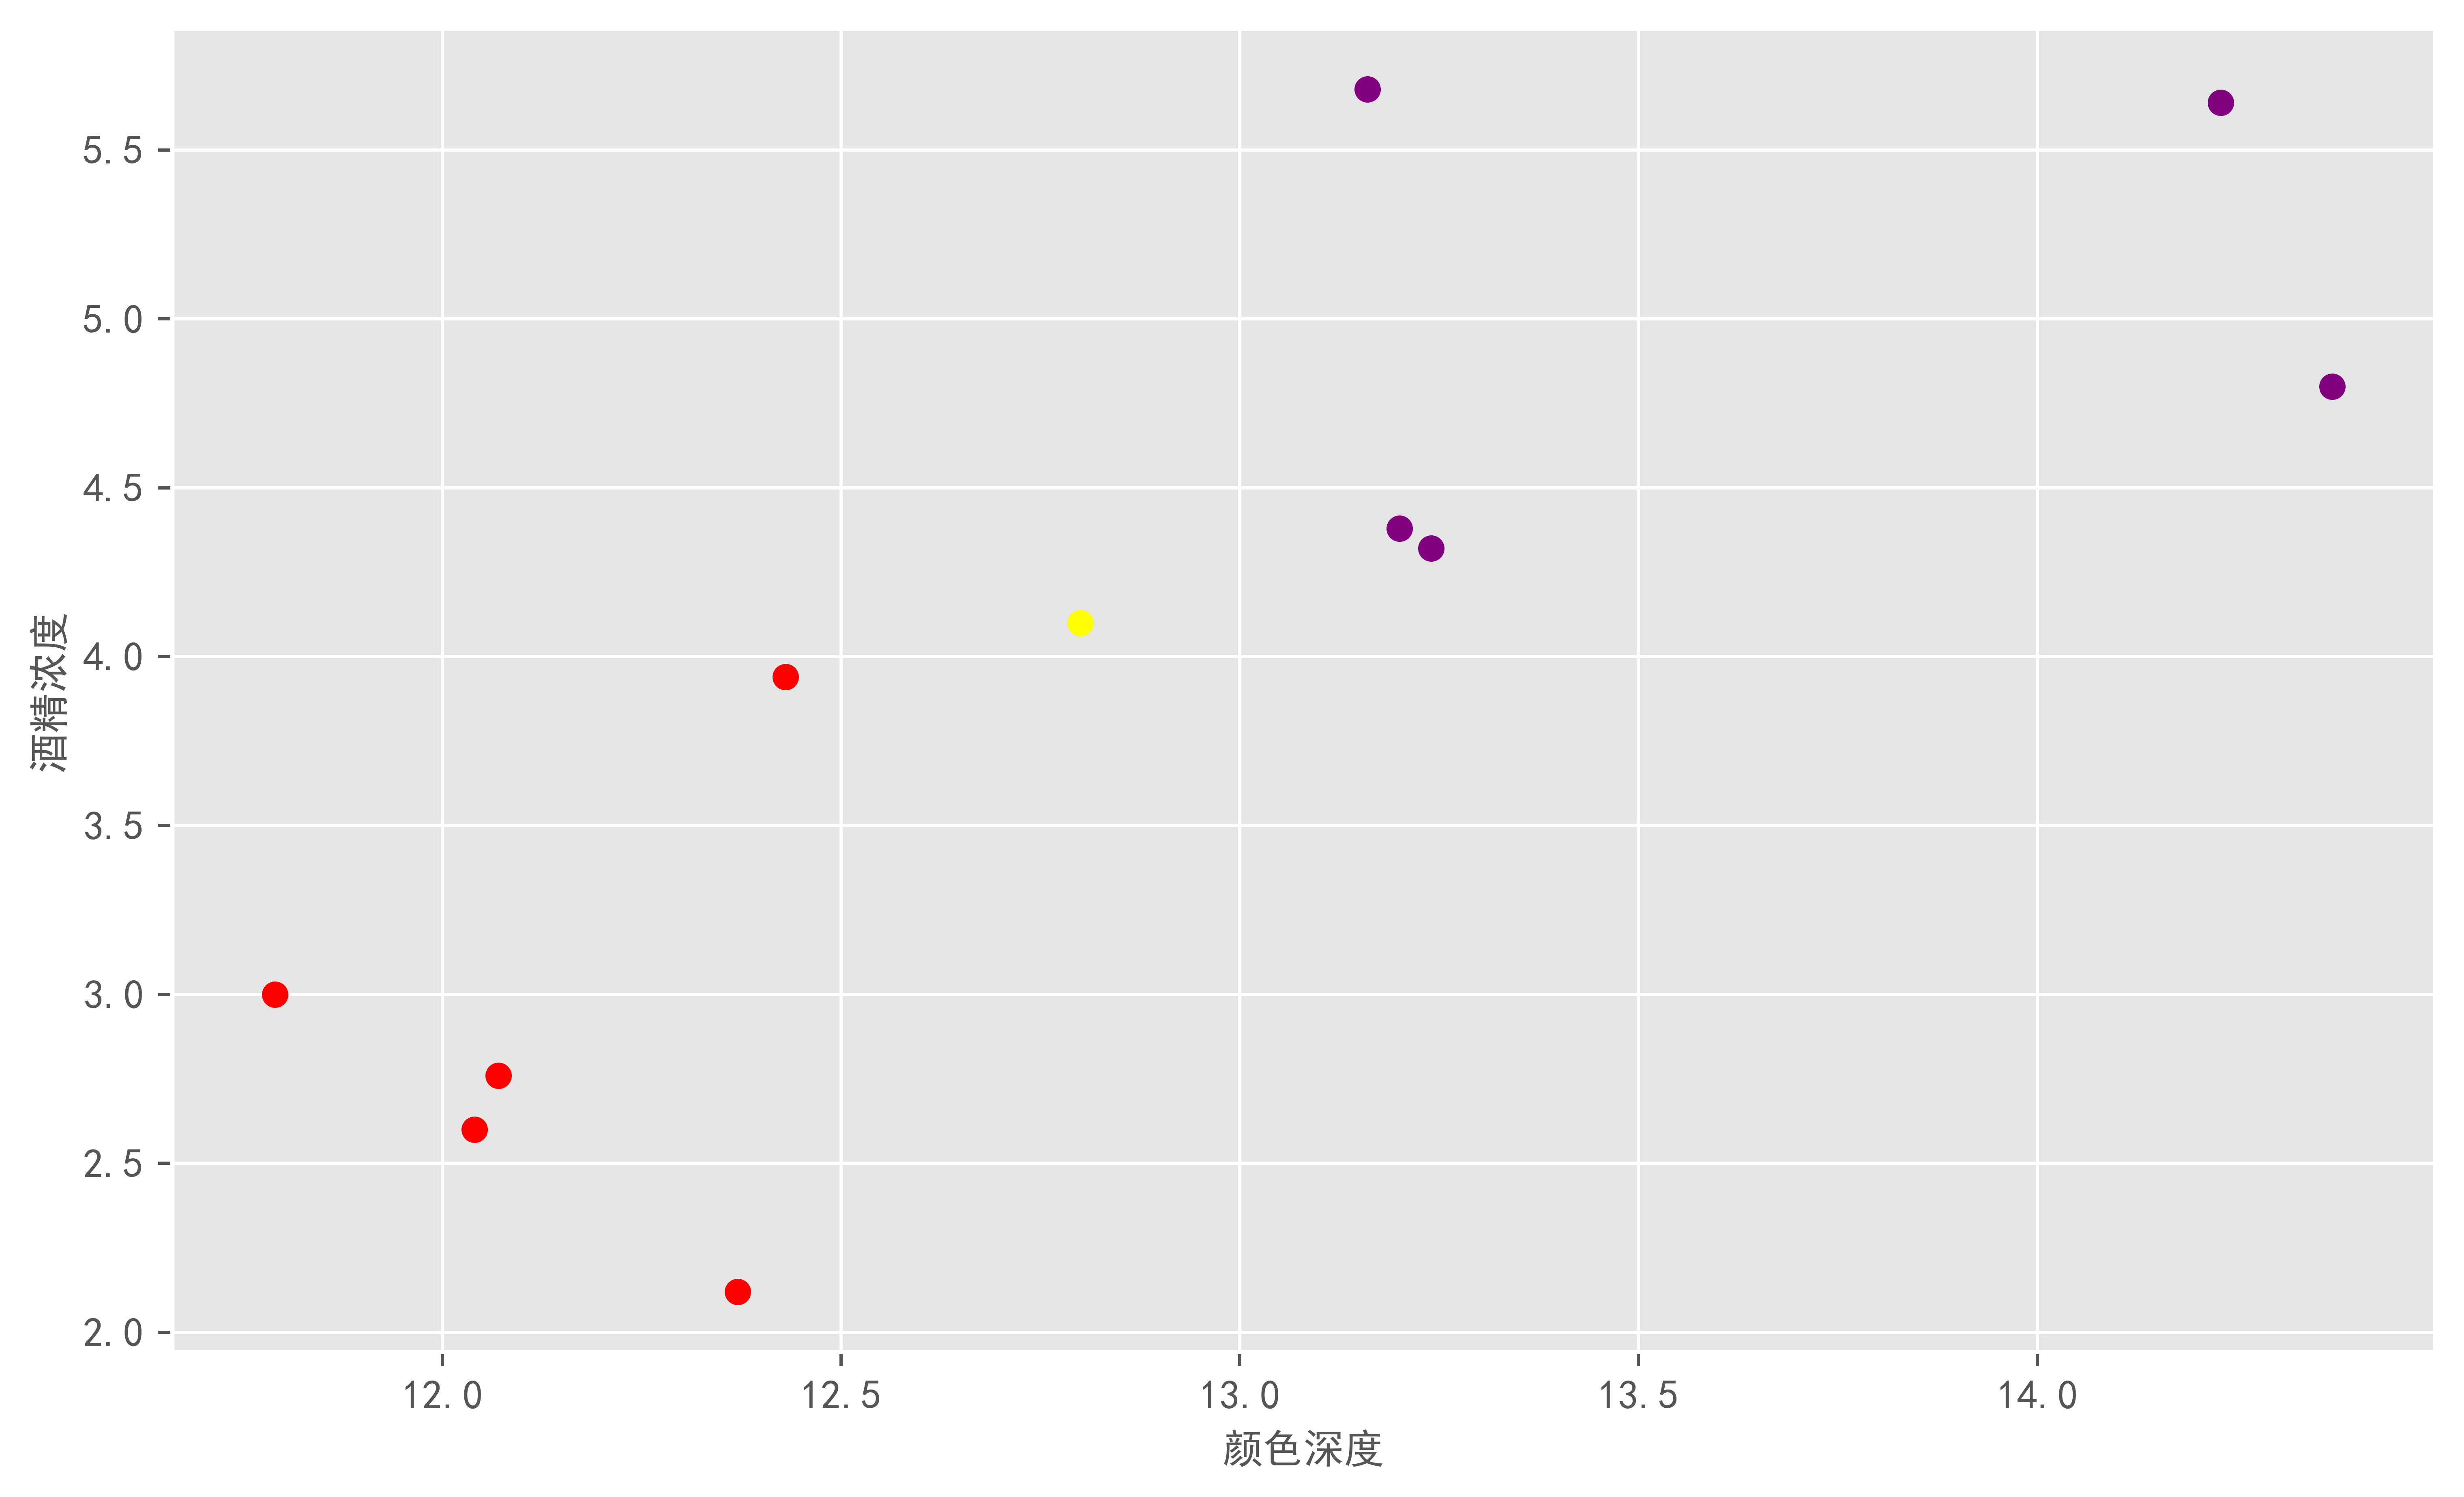

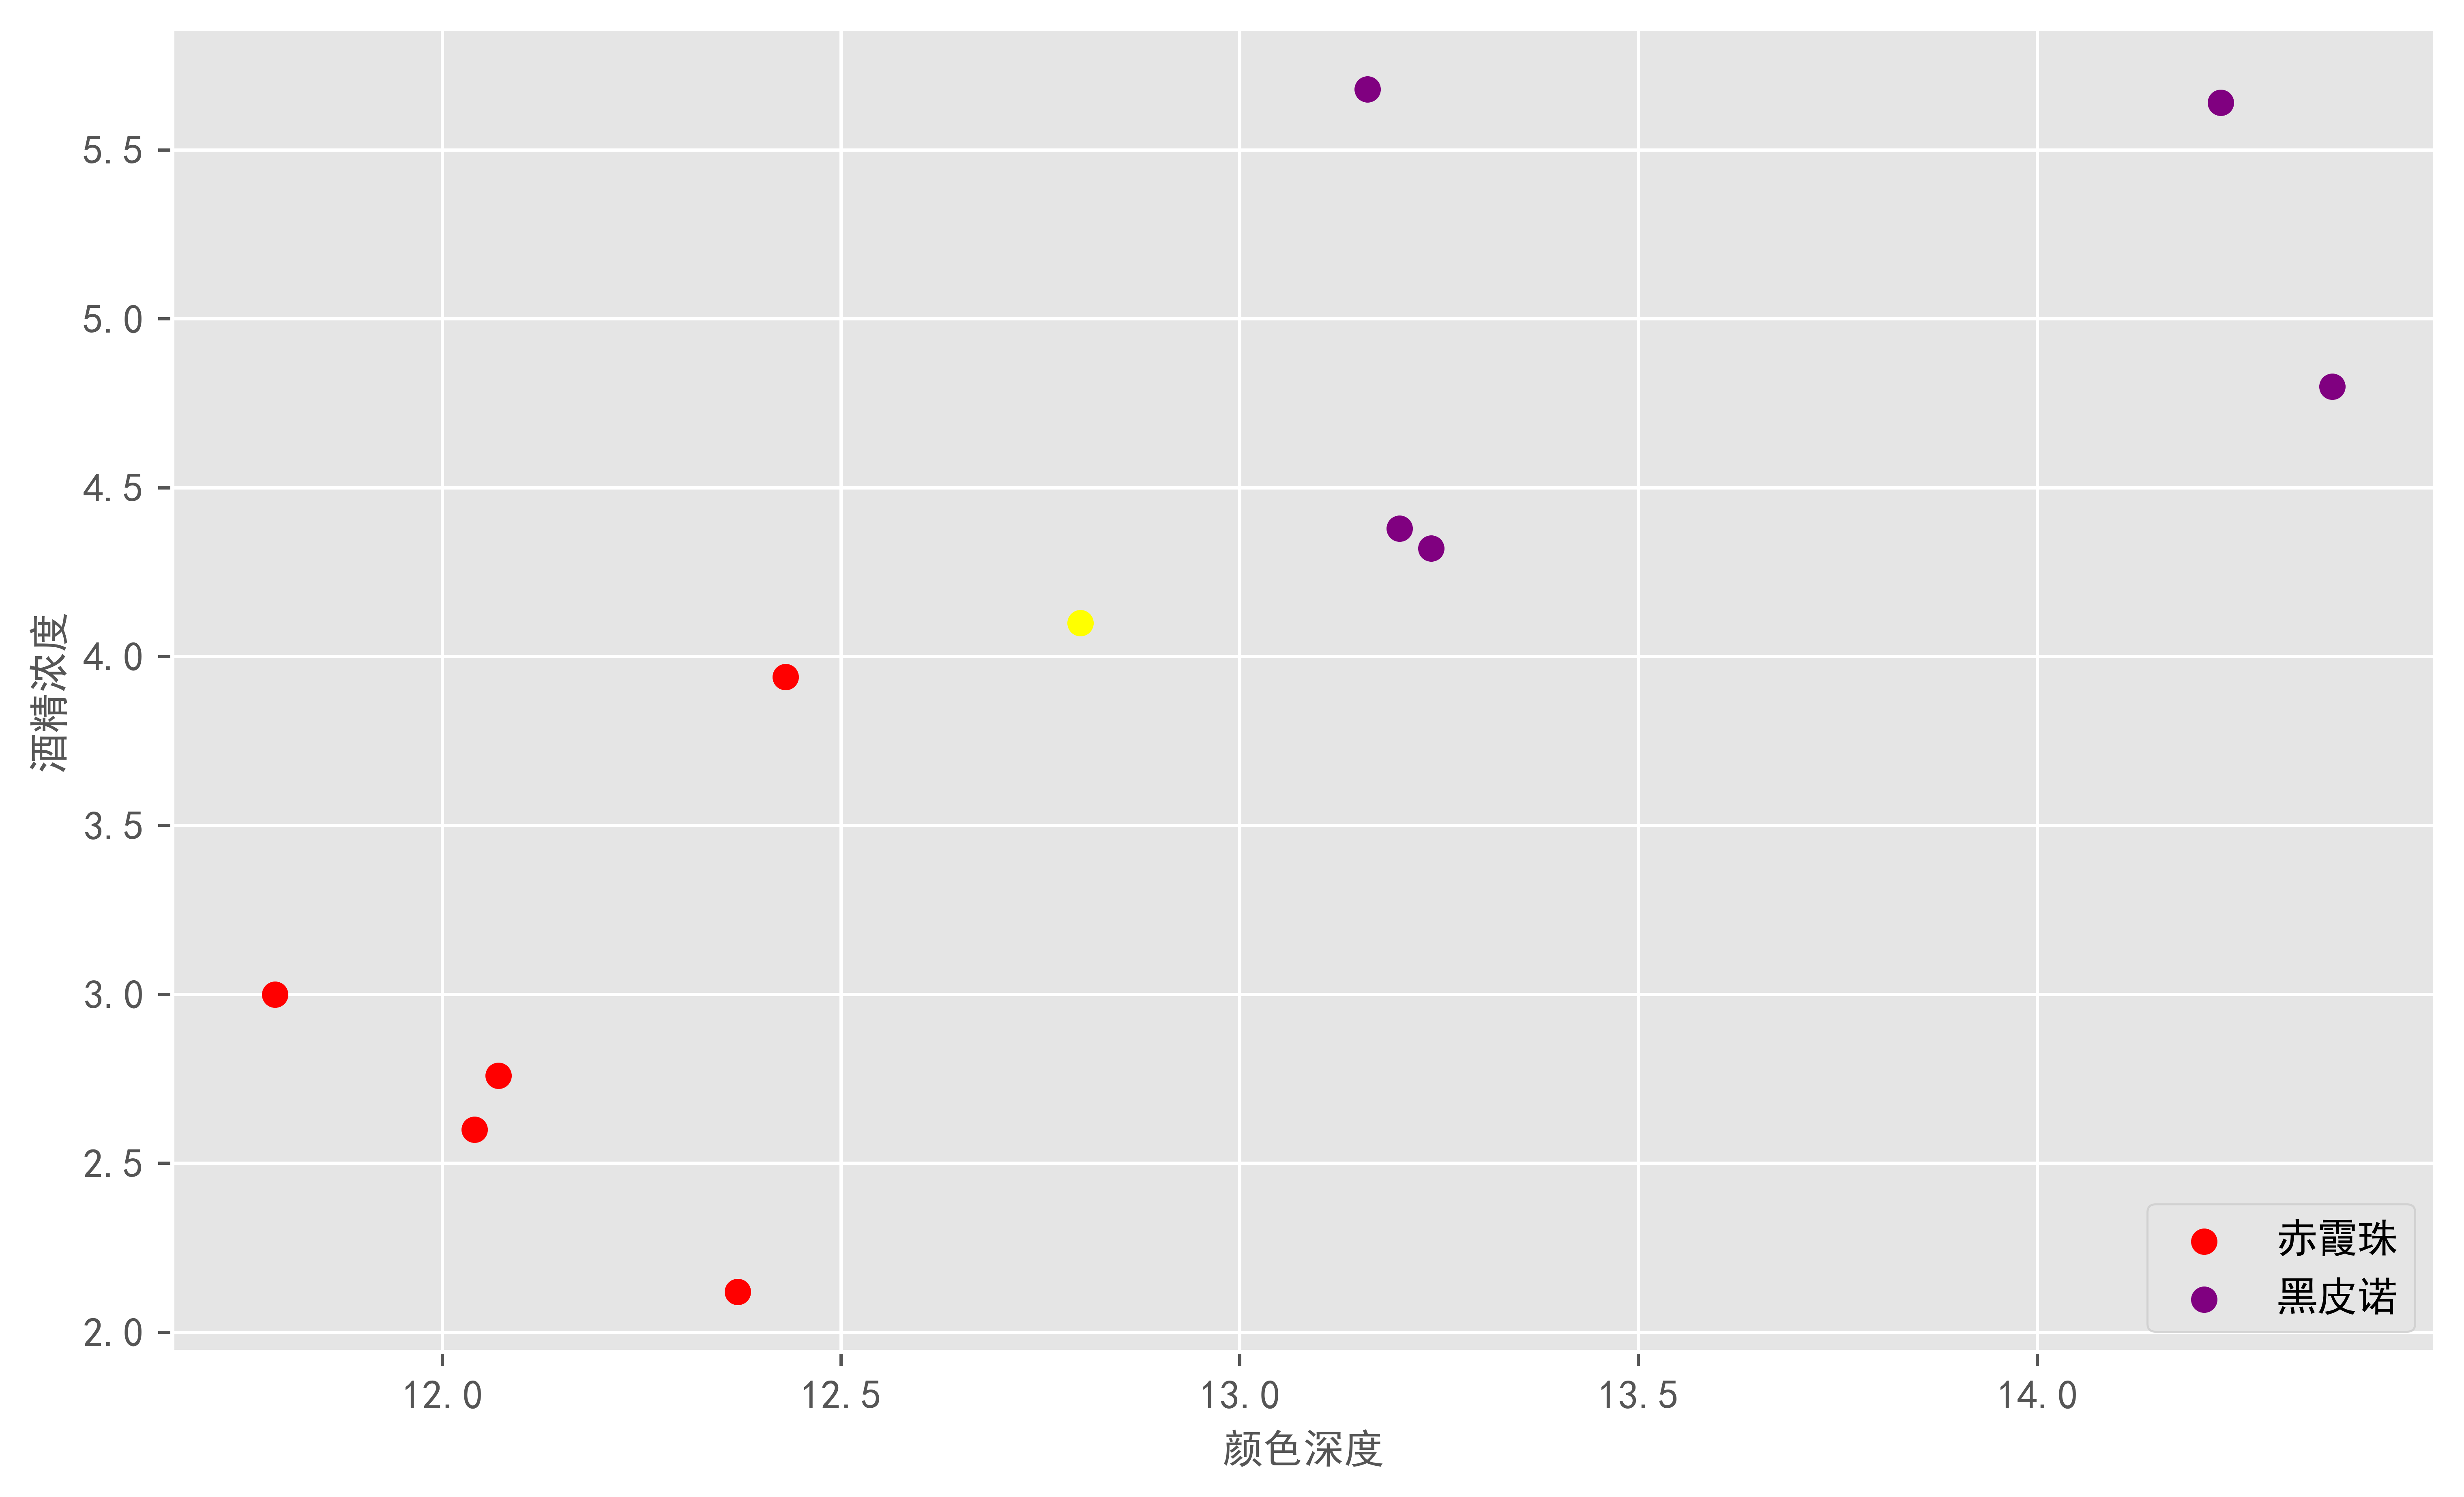

In [25]:
# plt.rcParams['font.sans-serif'] = ['KaiTi']
# plt.rcParams['font.serif'] = ['KaiTi']
font = 'SimHei'

plt.rcParams['font.sans-serif'] = font ## 设置中文显示   windows设置
plt.rcParams['font.family']=font   # mac的设置
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.figure(figsize=(10,6),dpi=720)

plt.scatter(X[y==1,0], X[y==1,1], color='red', label='赤霞珠')
plt.scatter(X[y==0,0], X[y==0,1], color='purple', label='黑皮诺')
plt.scatter(new_data[0],new_data[1], color='yellow')

plt.xlabel('颜色深度',fontproperties=font)
plt.ylabel('酒精浓度',fontproperties=font)

plt.rcParams['font.sans-serif'] = font ## 设置中文显示   windows设置
plt.rcParams['font.family']=font   # mac的设置
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

## 绘图
plt.figure(figsize=(10,6),dpi=720)

plt.scatter(X[y==1,0], X[y==1,1], color='red', label='赤霞珠')
plt.scatter(X[y==0,0], X[y==0,1], color='purple', label='黑皮诺')
plt.scatter(new_data[0],new_data[1], color='yellow')

plt.xlabel('颜色深度',fontproperties=font)
plt.ylabel('酒精浓度',fontproperties=font)
plt.legend(loc='lower right')
plt.savefig('葡萄酒样本.png')
## 由于安装了插件，所以显示两次图

In [26]:
from math import sqrt

In [27]:
distance = [sqrt(np.sum((x - new_data)**2)) for x in X]
distance # 新红酒和其他红酒之间的距离

[2.101547049199708,
 0.4882622246293471,
 1.6204937519163718,
 1.7189822570346662,
 0.49193495504995355,
 1.5259423318068084,
 0.4031128874149283,
 1.4933519344079622,
 2.026153992173349,
 1.6815469068687918]

In [28]:
# 选k的大小，设定新的样本点周围比较多少原始样本，为投票做准备
# 排序返回对应的index
sort_dist = np.argsort(distance)
sort_dist

array([6, 1, 4, 7, 5, 2, 9, 3, 8, 0], dtype=int64)

In [29]:
sort_dist[:3]

array([6, 1, 4], dtype=int64)

In [30]:
y[1]

0

In [32]:
k = 3 # 筛选中和新样本最近的三个原始样本 返回三个原始样本标签
topK = [y[i] for i in sort_dist[:k]]
topK

[1, 0, 0]

In [34]:
# 投票
from collections import Counter
votes = Counter(topK)  # 实现的功能和 pandas 的 value_counts 类似
votes

Counter({1: 1, 0: 2})

In [38]:
# 先 most_common 生成数组
# 然后 [0] 取得数组中的第一个元素
# 每个元素都是元组，[0] 读取元组中的第一个值
votes.most_common(1)[0][0]   # 相同的计数没有顺序

0

In [39]:
pred_y = votes.most_common(1)[0][0]
pred_y

0

## scikit-learn算法实现分类预测

In [23]:
from sklearn.neighbors import KNeighborsClassifier # 调用 KNN 分类器

# 0 代表 “黑皮诺”，1 代表 “赤霞珠” 

# 实例化：设置参数（算法模型当中需要自行设定或者是默认的算法逻辑和公式中的参数）
clf = KNeighborsClassifier(n_neighbors = 4)    

# 训练模型、学习数据：特征矩阵（二维特征矩阵）、标签（一维）  ndarray
clf = clf.fit(wine_data.iloc[:,0:2], wine_data.iloc[:,-1])   

# 返回预测的标签：通过predict接口做预测：传入二维的数组
result = clf.predict([[12.8,4.1]])
result

array([0], dtype=int64)

In [24]:
# 对模型进行一个评估，接口score返回预测的准确率[0.0,1.0]
score = clf.score([[12.8,4.1]],[0])  # 需要判断的数据特征，真实标签
score

1.0

In [46]:
clf.predict_proba([[12.8,4.1]])   # 预测概率：为了投票！！！！  阈值的划分标准：默认0.5为阈值   0.5表示的就是瞎猜

array([[0.5, 0.5]])

## 「练习」案例代码

### 调参

原始样本集（数据集）：特征矩阵、标签（有监督）

1. 训练集：模型学习使用的    （学习能力）
2. 测试集：模拟预测，用来评估模型的准确率和稳定性（泛化能力：举一反三）

如果学习能力很强，泛化能力很差，就会出现过拟合现象。如果说学习能力不足，就说明存在欠拟合现象。

未知样本：预测里面没有标签。

In [15]:
'''
1）datasets 乳腺癌的数据集：预测癌细胞的良性和恶性（二分类）
2）划分训练集和测试集
3）将数据实例化
'''
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [16]:
X = data.data
y = data.target

In [17]:
X.shape

(569, 30)

In [18]:
y.shape

(569,)

In [19]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
'''
划分训练集和测试集，test_size指的是测试集的大小
'''
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.3,random_state=0)

In [21]:
Xtrain.shape  # 训练集的特征矩阵

(398, 30)

In [26]:
# 建立模型
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(Xtrain,Ytrain)             # 学习训练集
print(clf.score(Xtrain,Ytrain))    # 训练集的准确率
print(clf.score(Xtest,Ytest))      # 测试集的准确率：用于模型评估

0.9396984924623115
0.9473684210526315


### 学习曲线

In [25]:
score = []    # 用来存储不同参数下的准确率的结果
k = range(1,20)

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

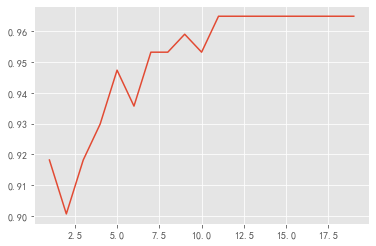

In [57]:
plt.plot(k, score)

### 交叉验证

In [58]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=5)
cvr = cross_val_score(clf, X,y, cv=5)   # 划分成5个子集，模型会做五次训练

# 均值：平均效果
cvr.mean()

0.9279459711224964

In [59]:
cvr

array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])

In [60]:
# 方差：查看模型是否稳定
cvr.var()

0.0004736178997683609

### 结合学习曲线和交叉验证共同进行

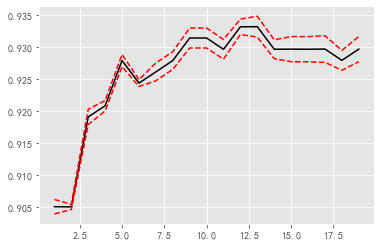

In [62]:
score = []
var_ = []
k = range(1,20)

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvr = cross_val_score(clf,X,y,cv=5)
    score.append(cvr.mean())
    var_.append(cvr.var())
    
plt.plot(k,score,color='k')
plt.plot(k,np.array(score)+np.array(var_)*2,color='red',linestyle='--')
plt.plot(k,np.array(score)-np.array(var_)*2,color='red',linestyle='--')

In [63]:
score.index(max(score))

12

In [64]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9649122807017544

归一化

In [7]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [10]:
mns = MinMaxScaler()
mns.fit(data)
mns.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [11]:
x = np.array([[-1,2],[-0.5,6],[0,10],[1,18]])
x

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [12]:
x_nor = (x - x.min(axis=0))/(x.max(axis=0) - x.min(axis=0))
x_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [32]:
# 放入乳腺癌的数据集操作
X_nor = MinMaxScaler().fit_transform(X)
X_nor

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [27]:
# 放入乳腺癌的数据集操作
X_nor = MinMaxScaler().fit_transform(X)

clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_nor,y)
clf.score(X_nor,y)

0.9789103690685413

In [28]:
Xtrain = MinMaxScaler().fit_transform(Xtrain)
Xtest = MinMaxScaler().fit_transform(Xtest)

clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9239766081871345

In [29]:
clf = KNeighborsClassifier(n_neighbors=12,weights='distance')
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9298245614035088